In [25]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [26]:
#read the CSV file into a dataframe
df= pd.read_csv('pG_picked_protein_group_no_remap_100.csv')

#select columns that you want to keep 
columns_to_keep=['Protein IDs', 'Q-value', 'Score']
new_df= df[columns_to_keep]
print(new_df)

#print(new_df) 
new_df.to_csv('ProteinIDs_picked_protein_group_no_remap_100_withScore.csv', index=False)

                                             Protein IDs   Q-value     Score
0          sp|Q9Y277|VDAC3_HUMAN;sp|Q9Y277-2|VDAC3_HUMAN  0.000165  4.000000
1      sp|P35579|MYH9_HUMAN;sp|A7E2Y1|MYH7B_HUMAN;sp|...  0.000165  4.000000
2            sp|P05121|PAI1_HUMAN;sp|P05121-2|PAI1_HUMAN  0.000165  3.999996
3                                  sp|O75477|ERLN1_HUMAN  0.000165  3.999996
4      sp|Q8WUM4|PDC6I_HUMAN;sp|Q8WUM4-2|PDC6I_HUMAN;...  0.000165  3.999996
...                                                  ...       ...       ...
23326  REV__sp|Q96SQ5|ZN587_HUMAN;REV__sp|Q96SQ5-2|ZN...  0.409294  0.303265
23327                              sp|Q96SJ8|TSN18_HUMAN  0.409294  0.302759
23328                       REV__sp|Q9UPT5-4|EXOC7_HUMAN  0.409328  0.302530
23329                         REV__sp|Q9BZA8|PC11Y_HUMAN  0.409386  0.302207
23330                       REV__sp|Q6ISS4-2|LAIR2_HUMAN  0.409444  0.301630

[23331 rows x 3 columns]


In [27]:
df = pd.read_csv('ProteinIDs_picked_protein_group_no_remap_100_withScore.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame and the new columns
new_df = pd.concat([df['Q-value'], split_col], axis=1)
print(new_df)
new_df.to_csv('SeparateProteinIDs_picked_protein_group_no_remap_100_withScore.csv')

        Q-value Protein Type Protein Uniprot  \
0      0.000165           sp          Q9Y277   
1      0.000165           sp          P35579   
2      0.000165           sp          P05121   
3      0.000165           sp          O75477   
4      0.000165           sp          Q8WUM4   
...         ...          ...             ...   
23326  0.409294      REV__sp          Q96SQ5   
23327  0.409294           sp          Q96SJ8   
23328  0.409328      REV__sp        Q9UPT5-4   
23329  0.409386      REV__sp          Q9BZA8   
23330  0.409444      REV__sp        Q6ISS4-2   

                                           Protein Label  
0                    VDAC3_HUMAN;sp|Q9Y277-2|VDAC3_HUMAN  
1      MYH9_HUMAN;sp|A7E2Y1|MYH7B_HUMAN;sp|P11055|MYH...  
2                      PAI1_HUMAN;sp|P05121-2|PAI1_HUMAN  
3                                            ERLN1_HUMAN  
4      PDC6I_HUMAN;sp|Q8WUM4-2|PDC6I_HUMAN;sp|Q8WUM4-...  
...                                                  ...  
23326     

sp         14604
REV__sp     5404
REV__sR      867
sR           863
REV__pI      649
pI           635
sU           112
REV__sU       88
nC            69
REV__nC       40
Name: Protein Type, dtype: int64


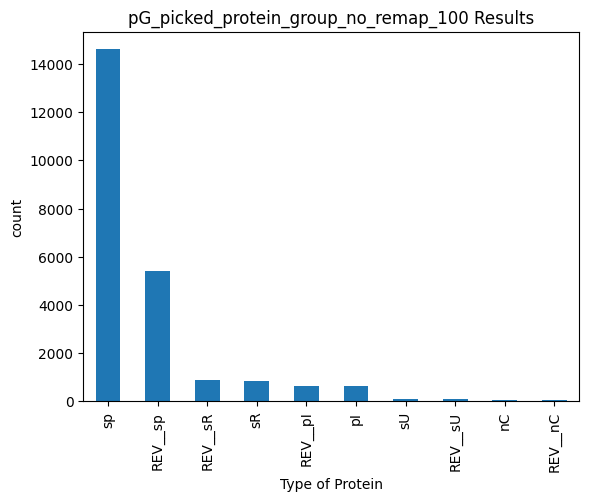

In [28]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remap_100_withScore.csv')

# Count the number of occurrences of each unique string in the 'Column 1' column
value_counts = df['Protein Type'].value_counts()

# Print the value counts
print(value_counts)

# Plot the value counts as a bar chart
value_counts.plot(kind='bar')
plt.title('pG_picked_protein_group_no_remap_100 Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
plt.show()

Protein Type
REV__pI       3
REV__sR       2
REV__sp      90
pI            2
sR            5
sU            1
sp         9557
Name: Protein Type, dtype: int64


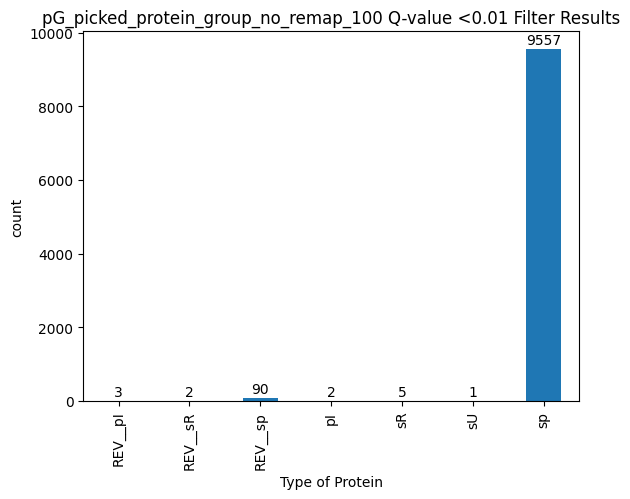

In [29]:
df = pd.read_csv('SeparateProteinIDs_picked_protein_group_no_remap_100_withScore.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

# group by protein type and count the number of each type
protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count()

# print the protein count
print(protein_count)

# Plot the value counts as a bar chart
protein_count.plot(kind='bar')
plt.title('pG_picked_protein_group_no_remap_100 Q-value <0.01 Filter Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()
          

In [30]:
# filter for Q-value >= 0.01
df_above_cutoff = df[df['Q-value'] >= 0.01]

# group by protein type and count the number of each type above the Q-value cutoff
protein_count_above = df_above_cutoff.groupby('Protein Type')['Protein Type'].count()

# print the protein counts
print("Protein count below Q-value cutoff:")
print(protein_count)
print("\nProtein count above Q-value cutoff:")
print(protein_count_above)

Protein count below Q-value cutoff:
Protein Type
REV__pI       3
REV__sR       2
REV__sp      90
pI            2
sR            5
sU            1
sp         9557
Name: Protein Type, dtype: int64

Protein count above Q-value cutoff:
Protein Type
REV__nC      40
REV__pI     646
REV__sR     865
REV__sU      88
REV__sp    5314
nC           69
pI          633
sR          858
sU          111
sp         5047
Name: Protein Type, dtype: int64


# Q-value filter CUTOFF <0.01

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_60709/2005987917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_60709/2005987917.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

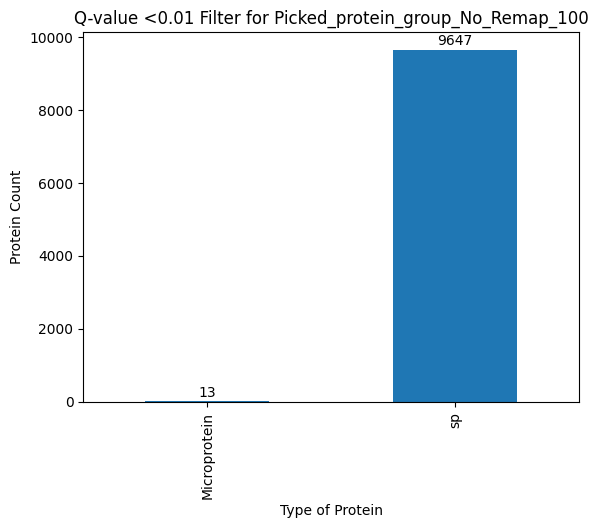

In [31]:

# filter for Q-value < 0.01
df_below_cutoff = df[df['Q-value'] < 0.01]

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')

# combine counts for sp and REV__sp as 'sp'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type below the Q-value cutoff
protein_count_below = df_below_cutoff.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count_below.plot(kind='bar')
plt.title('Q-value <0.01 Filter for Picked_protein_group_No_Remap_100')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')
# add labels to the bars
for i, count in enumerate(protein_count_below):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

# No Q-value filter

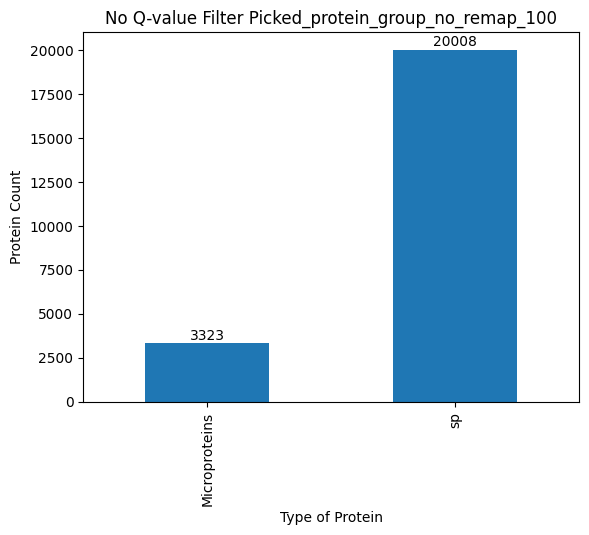

In [32]:
# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df['Protein Type'] = df['Protein Type'].replace(['REV__pI', 'REV__sR', 'REV__nC', 'REV__sU', 'pI', 'sR', 'nC', 'sU'], 'Microproteins')

# combine counts for sp and REV__sp as 'sp'
df['Protein Type'] = df['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type
protein_count = df.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count.plot(kind='bar')
plt.title('No Q-value Filter Picked_protein_group_no_remap_100')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')

# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()